## 2013 Club Championship Stats

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import requests

In [312]:
stats = pd.read_html('../../data/2013ClubChampStats.html')

In [313]:
stats_13 = stats[0]
stats_13.rename(columns={'Player':'Name', '#':'Number', 'Goals':'Goal', 'Assists':'Assist', 'Ds':'Block', 'TOs':'Turn'}, inplace=True)
stats_13['Tournament'] = '2013 USAU Club Championships'
for item in stats_13.Name:
    stats_13['Name'].replace(item, item.upper(), inplace=True)
for item in stats_13.Team:
    stats_13['Team'].replace(item, item.upper(), inplace=True)
stats_13.head(2)

,Team,Number,Name,Goal,Assist,Block,Turn,Tournament
0,BENT,0,BRITTANY KAPLAN,0,3,2,5,2013 USAU Club Championships
1,BENT,1,LEXI ZALK,4,1,4,0,2013 USAU Club Championships


Games

In [314]:
games_13 = {'BENT': 6,
 'BRUTE SQUAD': 6,
 'CAPITALS': 6,
 'FURY': 7,
 'HEIST': 6,
 'MOLLY BROWN': 6,
 'NEMESIS': 6,
 'NIGHTLOCK': 6,
 'NOVA': 6,
 'OZONE': 6,
 'PHOENIX': 6,
 'RIOT': 7,
 'SCANDAL': 7,
 'SCHWA': 6,
 'SHOWDOWN': 7,
 'TRAFFIC': 6}

In [315]:
games_list_13 = []
for item in stats_13.Team:
    games_list_13.append(games_13[item])

In [316]:
stats_13['Games'] = games_list_13

Final standings

In [317]:
standing_13 = {'BENT': 13,
 'BRUTE SQUAD': 6,
 'CAPITALS': 7,
 'FURY': 2,
 'HEIST': 12,
 'MOLLY BROWN': 11,
 'NEMESIS': 5,
 'NIGHTLOCK': 9,
 'NOVA': 16,
 'OZONE': 9,
 'PHOENIX': 14,
 'RIOT': 3,
 'SCANDAL': 1,
 'SCHWA': 15,
 'SHOWDOWN': 4,
 'TRAFFIC': 7}

In [318]:
standing_list_13 = []
for item in stats_13.Team:
    standing_list_13.append(standing_13[item])

In [319]:
stats_13['Standing'] = standing_list_13

Spirit

In [320]:
r = requests.get('http://www.usaultimate.org/news/2013-national-championships--spirit-of-the-game/?')
b = BeautifulSoup(r.text, 'html.parser')

In [321]:
b.find_all('table',{'width':'198'})[2]

<table border="1" cellpadding="1" cellspacing="1" class="tablesorter" style="font-size: 11px; font-style: normal; color: rgb(0, 0, 0);" width="198">\n<thead>\n<tr>\n<th><strong>Score</strong></th>\n<th><strong>Team</strong></th>\n</tr>\n</thead>\n<tbody>\n<tr>\n<td>4.43</td>\n<td bgcolor="#00ff00"><span style="background-color: rgb(0, 255, 0);">Riot</span></td>\n</tr>\n<tr>\n<td>4.36</td>\n<td>Scandal</td>\n</tr>\n<tr>\n<td>4.33</td>\n<td>Phoenix</td>\n</tr>\n<tr>\n<td>4.33</td>\n<td>Schwa</td>\n</tr>\n<tr>\n<td>4.17</td>\n<td>Heist</td>\n</tr>\n<tr>\n<td>4.17</td>\n<td>Nemesis</td>\n</tr>\n<tr>\n<td>4.14</td>\n<td>Fury</td>\n</tr>\n<tr>\n<td>4.14</td>\n<td>Showdown</td>\n</tr>\n<tr>\n<td>4.00</td>\n<td>Bent</td>\n</tr>\n<tr>\n<td>4.00</td>\n<td>Brute Squad</td>\n</tr>\n<tr>\n<td>4.00</td>\n<td>Nova</td>\n</tr>\n<tr>\n<td>3.83</td>\n<td>Capitals</td>\n</tr>\n<tr>\n<td>3.83</td>\n<td>Molly Brown</td>\n</tr>\n<tr>\n<td>3.83</td>\n<td>Traffic</td>\n</tr>\n<tr>\n<td>3.67</td>\n<td>Nightloc

In [322]:
import re

temp_scores = [str(item).split('\n') for item in b.find_all('table',{'width':'198'})[2].find('tbody')]

scores_13 = []

for item in temp_scores[1::2]:
    scores_13.append(item[1:3])

scores_13

spirit_13 = {}
count = 0

while count < len(scores_13):
    spirit_13[re.findall('([^>]*)</', scores_13[count][1])[0].upper()] = float(re.findall('([^>]*)</', scores_13[count][0])[0])

    count += 1
    
spirit_13

{'BENT': 4.0,
 'BRUTE SQUAD': 4.0,
 'CAPITALS': 3.83,
 'FURY': 4.14,
 'HEIST': 4.17,
 'MOLLY BROWN': 3.83,
 'NEMESIS': 4.17,
 'NIGHTLOCK': 3.67,
 'NOVA': 4.0,
 'OZONE': 3.0,
 'PHOENIX': 4.33,
 'RIOT': 4.43,
 'SCANDAL': 4.36,
 'SCHWA': 4.33,
 'SHOWDOWN': 4.14,
 'TRAFFIC': 3.83}

In [323]:
scores_list_13 = []
for item in stats_13.Team:
    scores_list_13.append(spirit_13[item])

In [324]:
stats_13['Spirit'] = scores_list_13
stats_13 = stats_13[['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn', 'Games', 'Tournament', 'Standing', 'Spirit']]

In [325]:
stats_13[stats_13.Team == 'TRAFFIC'].head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
379,TRAFFIC,0,TERRI WHITEHEAD,11,0,5,2,6,2013 USAU Club Championships,7,3.83
380,TRAFFIC,2,DANIELLE FORTIN,3,12,3,16,6,2013 USAU Club Championships,7,3.83
381,TRAFFIC,3,MICHELLE NING,0,3,1,2,6,2013 USAU Club Championships,7,3.83
382,TRAFFIC,4,KATIE BEREZAN,1,2,1,1,6,2013 USAU Club Championships,7,3.83
383,TRAFFIC,5,ASHLEE DAVISON,7,6,6,3,6,2013 USAU Club Championships,7,3.83


## 2014 Club Championship Stats

In [326]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [327]:
def get_team_stat_urls(Championship_Page_URL):
    import requests
    from bs4 import BeautifulSoup
    
    r = requests.get(Championship_Page_URL) 
    b = BeautifulSoup(r.text, 'html.parser')

    step1 = [str(item).split('\n') for item in b.find_all('tr', style='border: 1px solid #eee;')]
    step2 = [item[1][13:-9] for item in step1]
    step3 = [item.split('">') for item in step2]
    step4 = [item[1].split(' (') for item in step3]
    
    dict_name = {}
    
    for item in range(16):
        dict_name[step4[item][0]] = step3[item][0] 
    
    return dict_name

In [328]:
teams_2014 = get_team_stat_urls('http://play.usaultimate.org/events/USA-Ultimate-National-Championships/schedule/Women/Club-Women/')

In [329]:
teams_2014

{'Brute Squad': '/events/teams/?EventTeamId=xp%2bejIJBOcfXXkdUBdhyKw7QdaKTsy2msZaYJsN0QFI%3d',
 'Capitals': '/events/teams/?EventTeamId=QMEULDssKTN4OuwrBMNq94efa7qxYCOB39XjXXvDBuY%3d',
 'Fury': '/events/teams/?EventTeamId=CBkbxJkqtPUazzlNKxrMYL476TAvWyT%2b%2bII9vIya7AM%3d',
 'Green Means Go': '/events/teams/?EventTeamId=ejfj3ptI1RiAMMNBDBMR%2bOWMPBwsN0Y86S%2fuCAYPw9U%3d',
 'Heist': '/events/teams/?EventTeamId=h%2bkaG2ZXhVd798X3lGV7PeEc5SUIuvMgQy9BNMokNsM%3d',
 'Molly Brown': '/events/teams/?EventTeamId=cKqY9nt%2bZuiYvmdlJ2MwdG0cK1L9yUN%2bWnowMqR1zKg%3d',
 'Nemesis': '/events/teams/?EventTeamId=mIbs2PBWcyioQl2JAuLt1FjcCr3eIAK7iEJX3hRzIO8%3d',
 'Nightlock': '/events/teams/?EventTeamId=KWGXFcYyimfQtEQ%2fDYoEE7kZ1HzzEC0yN7KIfYlhSWg%3d',
 'Ozone': '/events/teams/?EventTeamId=01oilPzTzWp6xnsGkQ0uJtZl64NEdUOHJ0wQZrvMnNY%3d',
 'Riot': '/events/teams/?EventTeamId=ddLOZCRcEzHqNrt1jat3nz4wNJ%2f7YNKK5OZQonhRuaQ%3d',
 'Scandal': '/events/teams/?EventTeamId=m%2f3%2f0BtHZz5iI3aEgO1fqtpMAlDOwL7dnQ9uEQ

In [330]:
# explore existing columns

r = requests.get('http://play.usaultimate.org' + teams_2014['Traffic']) #any team name will do
team_page = BeautifulSoup(r.text, 'html.parser')

In [331]:
columns_2014 = [str(item)[15:-5] for item in team_page.find('div', id='roster_list').find_all('th', span='col')]

In [332]:
columns_2014

['No.',
 'Name',
 'Position',
 'Year',
 'Height',
 'Goals',
 'Assists',
 'Ds',
 'Turns']

In [333]:
def get_stats_page(team_name, dict_name):
    # get html of team stats page
    r = requests.get('http://play.usaultimate.org' + dict_name[team_name])
    team_page = BeautifulSoup(r.text, 'html.parser')
    return team_page.find('div', id='roster_list')

In [334]:
def player_info(team_name, dict_name):
    
    List1 = [str(item)[4:-5] for item in get_stats_page(team_name, dict_name).find_all('td')]
    
    playerInfo = []
    count = 0
    
    while count < len(List1):
        
        info = {}

        info['Number'] = List1[count]
        info['Name'] = List1[count+1].upper()
#         info['Position'] = List1[count+2]
#         info['Year'] = List1[count+3]
#         info['Height'] = List1[count+4]
        info['Goal'] = int(List1[count+5])
        info['Assist'] = int(List1[count+6])
        info['Block'] = np.nan # int(List1[count+7])
        info['Turn'] = np.nan # int(List1[count+8])
        info['Team'] = team_name.upper()
        
        count += 9
        playerInfo.append(info)
    
    return playerInfo

In [335]:
def get_stats(dict_name):
    stats = []

    for team in dict_name:
        stats += player_info(str(team), dict_name)
    
    return stats

In [336]:
import numpy as np
from pandas import DataFrame, Series

stats_14 = DataFrame.from_dict(get_stats(teams_2014))
stats_14.head()

,Assist,Block,Goal,Name,Number,Team,Turn
0,0,NaN,0,KARA KELLY,00,NIGHTLOCK,NaN
1,2,NaN,2,SHARON TSENG,01,NIGHTLOCK,NaN
2,7,NaN,5,MARISA RAFTER,02,NIGHTLOCK,NaN
3,3,NaN,3,MICHAELA LEE,03,NIGHTLOCK,NaN
4,5,NaN,3,MARIKA AUSTIN,04,NIGHTLOCK,NaN


In [337]:
cols = ['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn']
stats_14 = stats_14[cols]
stats_14['Tournament'] = '2014 USAU Club Championships'
stats_14.tail()

,Team,Number,Name,Goal,Assist,Block,Turn,Tournament
386,GREEN MEANS GO,44,NATALIE GUSTAFSON,1,0,NaN,NaN,2014 USAU Club Championships
387,GREEN MEANS GO,51,JAMIE BARR,0,0,NaN,NaN,2014 USAU Club Championships
388,GREEN MEANS GO,53,MARGIE GUY,0,0,NaN,NaN,2014 USAU Club Championships
389,GREEN MEANS GO,66,SHERRY LI,1,1,NaN,NaN,2014 USAU Club Championships
390,GREEN MEANS GO,88,EILEEN PEACH REGAN,0,0,NaN,NaN,2014 USAU Club Championships


Games

In [338]:
games_14 = {'BRUTE SQUAD': 6,
 'CAPITALS': 4,
 'FURY': 7,
 'GREEN MEANS GO': 4,
 'HEIST': 4,
 'MOLLY BROWN': 5,
 'NEMESIS': 4,
 'NIGHTLOCK': 4,
 'OZONE': 5,
 'RIOT': 6,
 'SCANDAL': 7,
 'SCHWA': 4,
 'SHOWDOWN': 5,
 'TABBY ROSA': 4,
 'TRAFFIC': 5,
 'UNDERGROUND': 4}

In [339]:
games_list_14 = []
for item in stats_14.Team:
    games_list_14.append(games_14[item])

In [340]:
stats_14['Games'] = games_list_14

Standing

In [341]:
standing_14 = {'BRUTE SQUAD': 3,
 'CAPITALS': 14,
 'FURY': 2,
 'GREEN MEANS GO': 15,
 'HEIST': 11,
 'MOLLY BROWN': 9,
 'NEMESIS': 13,
 'NIGHTLOCK': 7,
 'OZONE': 5,
 'RIOT': 3,
 'SCANDAL': 1,
 'SCHWA': 9,
 'SHOWDOWN': 6,
 'TABBY ROSA': 16,
 'TRAFFIC': 7,
 'UNDERGROUND': 12}

In [342]:
standing_list_14 = []
for item in stats_14.Team:
    standing_list_14.append(standing_14[item])

In [343]:
stats_14['Standing'] = standing_list_14

Spirit

In [344]:
# spirit scores
r = requests.get('http://play.usaultimate.org/events/usa-ultimate-national-championships/')
b = BeautifulSoup(r.text, 'html.parser')

scores_14 = [str(item).split('\n')[2:5:2] for item in b.find_all('table',{'width':'400'})[2].find_all('tr')]
scores_14

[['<td width="150"><strong>Team</strong></td>',
  '<td width="100"><strong>Spirit Score</strong></td>'],
 ['<td>Scandal</td>', '<td>\xc2\xa012.71</td>'],
 ['<td>Fury</td>', '<td>\xc2\xa013.43</td>'],
 ['<td>Brute Squad</td>', '<td>\xc2\xa013.40</td>'],
 ['<td>Riot</td>', '<td>\xc2\xa014.17</td>'],
 ['<td><span style="font-size: 10.9090909957886px;">Ozone</span></td>',
  '<td>\xc2\xa010.86</td>'],
 ['<td>Showdown</td>', '<td>\xc2\xa011.17</td>'],
 ['<td>Traffic</td>', '<td>\xc2\xa012.14</td>'],
 ['<td>Nightlock</td>', '<td>\xc2\xa013.71</td>'],
 ['<td>Molly Brown</td>', '<td>\xc2\xa013.71</td>'],
 ['<td>Schwa</td>', '<td>\xc2\xa014.07</td>'],
 ['<td>Heist</td>', '<td>\xc2\xa014.71</td>'],
 ['<td>Underground</td>', '<td>\xc2\xa012.71</td>'],
 ['<td>Nemesis</td>', '<td>\xc2\xa011.71</td>'],
 ['<td>Capitals</td>', '<td>\xc2\xa013.17</td>'],
 ['<td>Green Means Go</td>', '<td>\xc2\xa013.43</td>'],
 ['<td>Tabby Rosa</td>', '<td>\xc2\xa015.29</td>']]

In [345]:
# re.findall('([^>]*)</', scores_14[1][0])[0].upper() # for team
# scores_14[count][1][6:-5] # score
# float(re.findall('([^>]*)</', scores[count][0])[0])

In [346]:
import re

spirit_14 = {}
count = 1

while count < len(scores_14):
    spirit_14[re.findall('([^>]*)</', scores_14[count][0])[0].upper()] = float(scores_14[count][1][6:-5])

    count += 1
    
spirit_14

{'BRUTE SQUAD': 13.4,
 'CAPITALS': 13.17,
 'FURY': 13.43,
 'GREEN MEANS GO': 13.43,
 'HEIST': 14.71,
 'MOLLY BROWN': 13.71,
 'NEMESIS': 11.71,
 'NIGHTLOCK': 13.71,
 'OZONE': 10.86,
 'RIOT': 14.17,
 'SCANDAL': 12.71,
 'SCHWA': 14.07,
 'SHOWDOWN': 11.17,
 'TABBY ROSA': 15.29,
 'TRAFFIC': 12.14,
 'UNDERGROUND': 12.71}

In [347]:
scores_list_14 = []
for item in stats_14.Team:
    scores_list_14.append(spirit_14[item])

In [348]:
stats_14['Spirit'] = scores_list_14
stats_14 = stats_14[['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn', 'Games', 'Tournament', 'Standing', 'Spirit']]
stats_14.sort_values('Standing', ascending=False).head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
355,TABBY ROSA,15,AMANDA SCHWORM,3,0,NaN,NaN,4,2014 USAU Club Championships,16,15.29
356,TABBY ROSA,18,SHAYNA BROCK,2,0,NaN,NaN,4,2014 USAU Club Championships,16,15.29
349,TABBY ROSA,05,DIANA ELSNER,0,1,NaN,NaN,4,2014 USAU Club Championships,16,15.29
350,TABBY ROSA,06,ALEXA WOOD,0,0,NaN,NaN,4,2014 USAU Club Championships,16,15.29
351,TABBY ROSA,07,KELSEY VIARS,14,3,NaN,NaN,4,2014 USAU Club Championships,16,15.29


In [349]:
stats_14[stats_14.Team == 'SCANDAL'].sort_values('Goal', ascending=False).head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
338,SCANDAL,37,SANDRA JORGENSEN,21,4,NaN,NaN,7,2014 USAU Club Championships,1,12.71
333,SCANDAL,19,ALICIA WHITE,10,5,NaN,NaN,7,2014 USAU Club Championships,1,12.71
323,SCANDAL,04,SARAH ITOH,8,4,NaN,NaN,7,2014 USAU Club Championships,1,12.71
325,SCANDAL,06,ASHLEY DALY MORGAN,7,3,NaN,NaN,7,2014 USAU Club Championships,1,12.71
326,SCANDAL,07,KIMBERLY BEACH,7,2,NaN,NaN,7,2014 USAU Club Championships,1,12.71


## 2015 Club Championship Stats

In [350]:
teams_2015 = get_team_stat_urls('http://play.usaultimate.org/events/USA-Ultimate-National-Championships-2015/schedule/Women/Club-Women/')

In [351]:
teams_2015

{'BENT': '/events/teams/?EventTeamId=tl1rkVLjdczXVbOWzjG8T6fVjubOyhxGoQqAHV0da4g%3d',
 'Brute Squad': '/events/teams/?EventTeamId=c%2bbyh9S9ANQUYGFX55jj2huoFtowEZg%2fAyga4pprMQ0%3d',
 'Capitals': '/events/teams/?EventTeamId=x4u7Gvp5rOjImw437isTD%2fs%2bQ06953u7JY%2f95O2ZmYY%3d',
 'Fury': '/events/teams/?EventTeamId=32oHgC3wTopGTV3EhDSbH36OX0nyemEg%2bP5KQfBRE1g%3d',
 'Heist': '/events/teams/?EventTeamId=CpQQbzcjJ0UXcqhrXjm3d8zVp0%2fIhQBVr%2fCVAX8yEAY%3d',
 'Iris': '/events/teams/?EventTeamId=Wy3HoIVoyiewP6W0uRSYiIJo8RJY0m3zrLvGpRwtEwI%3d',
 'Molly Brown': '/events/teams/?EventTeamId=RbDtI%2bYRGJIFXwMyY2GXHZNkAP4TG3e5cYp%2bwYagX5s%3d',
 'Nemesis': '/events/teams/?EventTeamId=crhCXpLrJODvUJL6ppk9K1V8i2mXHNLATKv1ZOibPUc%3d',
 'Nightlock': '/events/teams/?EventTeamId=EfdvGasY6mEwfXfzbwlKQKOo3de2IF4mbYrPHnmtd2Q%3d',
 'Ozone': '/events/teams/?EventTeamId=iAImqQuifQ77w%2bC0P2niH56jBIDV%2fpmjWfCpaiDP%2brQ%3d',
 'Phoenix': '/events/teams/?EventTeamId=CB%2br3JHfJtcIvZONww0nNVHSZZMq9jH%2frilvqOvHLy

In [352]:
stats_15 = DataFrame.from_dict(get_stats(teams_2015))

In [353]:
stats_15 = stats_15[cols]
stats_15['Tournament'] = '2015 USAU Club Championships'

In [354]:
for item in stats_15.Team:
    if item == 'SEATTLE RIOT':
        stats_15['Team'].replace(item, 'RIOT', inplace=True)

Games

In [355]:
games_15 = {'BENT': 7,
 'BRUTE SQUAD': 7,
 'CAPITALS': 7,
 'FURY': 6,
 'HEIST': 7,
 'IRIS': 7,
 'MOLLY BROWN': 6,
 'NEMESIS': 7,
 'NIGHTLOCK': 7,
 'OZONE': 7,
 'PHOENIX': 7,
 'RIOT': 7,
 'SCANDAL': 7,
 'SCHWA': 7,
 'SHOWDOWN': 7,
 'TRAFFIC': 7}

In [356]:
games_list_15 = []
for item in stats_15.Team:
    games_list_15.append(games_15[item])

In [357]:
stats_15['Games'] = games_list_15

Standing

In [358]:
standing_15 = {'BENT': 14,
 'BRUTE SQUAD': 1,
 'CAPITALS': 13,
 'FURY': 3,
 'HEIST': 9,
 'IRIS': 12,
 'MOLLY BROWN': 3,
 'NEMESIS': 16,
 'NIGHTLOCK': 7,
 'OZONE': 9,
 'PHOENIX': 7,
 'RIOT': 2,
 'SCANDAL': 6,
 'SCHWA': 11,
 'SHOWDOWN': 15,
 'TRAFFIC': 5}

In [359]:
standing_list_15 = []
for item in stats_15.Team:
    standing_list_15.append(standing_15[item])

In [360]:
stats_15['Standing'] = standing_list_15

Spirit Scores

In [361]:
# spirit scores
r = requests.get('http://play.usaultimate.org/events/usa-ultimate-national-championships-2015/')
b = BeautifulSoup(r.text, 'html.parser')

scores_15 = [str(item).split('\n')[2:5:2] for item in b.find_all('table',{'width':'400'})[2].find_all('tr')]
scores_15

[['<td width="150"><strong>Team</strong></td>',
  '<td width="100"><strong>Spirit Score</strong></td>'],
 ['<td>Brute Squad</td>', '<td>\xc2\xa011.00</td>'],
 ['<td>Riot</td>', '<td>\xc2\xa014.00</td>'],
 ['<td>Fury</td>', '<td>\xc2\xa013.60</td>'],
 ['<td>Molly Brown</td>', '<td>\xc2\xa011.33</td>'],
 ['<td><span style="font-size: 10.9091px;">Traffic</span></td>',
  '<td>\xc2\xa012.00</td>'],
 ['<td>Scandal</td>', '<td>\xc2\xa011.64</td>'],
 ['<td>Nightlock</td>', '<td>\xc2\xa010.43</td>'],
 ['<td>Phoenix</td>', '<td>\xc2\xa012.00</td>'],
 ['<td>Ozone</td>', '<td>\xc2\xa010.71</td>'],
 ['<td>Heist</td>', '<td>\xc2\xa011.00</td>'],
 ['<td>Schwa</td>', '<td>\xc2\xa011.67</td>'],
 ['<td>Iris</td>', '<td>\xc2\xa011.29</td>'],
 ['<td>Capitals</td>', '<td>\xc2\xa010.43</td>'],
 ['<td>Bent</td>', '<td>\xc2\xa07.43</td>'],
 ['<td>Showdown</td>', '<td>\xc2\xa08.14</td>'],
 ['<td>Nemesis</td>', '<td>\xc2\xa011.00</td>']]

In [362]:
import re

spirit_15 = {}
count = 1

while count < len(scores_14):
    spirit_15[re.findall('([^>]*)</', scores_15[count][0])[0].upper()] = float(scores_15[count][1][6:-5])

    count += 1
    
spirit_15

{'BENT': 7.43,
 'BRUTE SQUAD': 11.0,
 'CAPITALS': 10.43,
 'FURY': 13.6,
 'HEIST': 11.0,
 'IRIS': 11.29,
 'MOLLY BROWN': 11.33,
 'NEMESIS': 11.0,
 'NIGHTLOCK': 10.43,
 'OZONE': 10.71,
 'PHOENIX': 12.0,
 'RIOT': 14.0,
 'SCANDAL': 11.64,
 'SCHWA': 11.67,
 'SHOWDOWN': 8.14,
 'TRAFFIC': 12.0}

In [363]:
scores_list_15 = []
for item in stats_15.Team:
    scores_list_15.append(spirit_15[item])

In [364]:
stats_15['Spirit'] = scores_list_15
stats_15 = stats_15[['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn', 'Games', 'Tournament', 'Standing', 'Spirit']]
stats_15.head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
0,IRIS,00,CAROLINE CADOTTE,0,0,NaN,NaN,7,2015 USAU Club Championships,12,11.29
1,IRIS,00,MARIANNE PILON,0,0,NaN,NaN,7,2015 USAU Club Championships,12,11.29
2,IRIS,00,STéPHANIE VILLANUEVA,0,0,NaN,NaN,7,2015 USAU Club Championships,12,11.29
3,IRIS,01,JULIE DAVIAU,9,1,NaN,NaN,7,2015 USAU Club Championships,12,11.29
4,IRIS,04,MARIE GENEST,6,19,NaN,NaN,7,2015 USAU Club Championships,12,11.29


## 2012 WUGC Stats

In [365]:
# http://fdsys.jfda.or.jp/pscore/scv_team/open/85?lang=en

import requests
from bs4 import BeautifulSoup
import pandas as pd

r = requests.get('http://fdsys.jfda.or.jp/pscore/scv_team/open/85?lang=en') 
b = BeautifulSoup(r.text, 'html.parser')

# b.findAll('span',{'class':'SCV_MIDA_M'})
b.find('table',{'style':'width: 95%'}).find('tr',{'class':''}).text.split('\n')

[u'', u'#', u'Player', u'Games', u'Assist', u'Goal', u'Tot.', u'block', u'']

In [366]:
columns_2012WUGC = b.find('table',{'style':'width: 95%'}).find('tr',{'class':''}).text.split('\n')[1:-1]
columns_2012WUGC

[u'#', u'Player', u'Games', u'Assist', u'Goal', u'Tot.', u'block']

In [367]:
# b.find('table',{'style':'width: 95%'}).find_all('td')[7:]

In [368]:
List1 = [str(item)[15:-5] for item in b.find('table',{'style':'width: 95%'}).find_all('td')[7:]]
List1
# List1[1].split('</span>')[1][:-5]
int(List1[5][:-2])

35

In [369]:
def player_info_dict():
    
    List1 = [str(item)[15:-5] for item in b.find('table',{'style':'width: 95%'}).find_all('td')[7:]]
    
    playerInfo = []
    count = 0
    
    while count < len(List1):
        
        info = {}

        info['#'] = List1[count]
        info['Player'] = List1[count+1].split('</span>')[1][:-5].upper()
        info['Games'] = int(List1[count+2])
        info['Assist'] = int(List1[count+3])
        info['Goals'] = int(List1[count+4])
        info['Team'] = 'FURY'
        info['Block'] = np.nan
        info['Turn'] = np.nan
        
        count += 7
        playerInfo.append(info)
    
    return playerInfo

In [370]:
# player_info_dict()

In [371]:
from pandas import DataFrame, Series
stats_12WUGC = DataFrame.from_dict(player_info_dict())

stats_12WUGC.rename(columns={'#':'Number', 'Goals':'Goal', 'Player':'Name'}, inplace=True)
stats_12WUGC = stats_12WUGC[['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn']]
stats_12WUGC['Games'] = 12
stats_12WUGC['Tournament'] = '2012 WUGC'
stats_12WUGC['Standing'] = 2
stats_12WUGC.head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing
0,FURY,4,ALEX SNYDER,3,32,NaN,NaN,12,2012 WUGC,2
1,FURY,19,GEORGIA BOSSCHER,13,14,NaN,NaN,12,2012 WUGC,2
2,FURY,7,KAELA JORGENSON,12,10,NaN,NaN,12,2012 WUGC,2
3,FURY,13,CREE HOWARD,15,6,NaN,NaN,12,2012 WUGC,2
4,FURY,26,ALICIA WHITE,16,2,NaN,NaN,12,2012 WUGC,2


In [372]:
# SOTG Score http://www.wfdf.org/news-media/news/news/463-world-flying-disc-federation-releases-spirit-scores-from-2012-world-ultimate-championships
stats_12WUGC['Spirit'] = 12.00

In [373]:
stats_12WUGC.head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
0,FURY,4,ALEX SNYDER,3,32,NaN,NaN,12,2012 WUGC,2,12
1,FURY,19,GEORGIA BOSSCHER,13,14,NaN,NaN,12,2012 WUGC,2,12
2,FURY,7,KAELA JORGENSON,12,10,NaN,NaN,12,2012 WUGC,2,12
3,FURY,13,CREE HOWARD,15,6,NaN,NaN,12,2012 WUGC,2,12
4,FURY,26,ALICIA WHITE,16,2,NaN,NaN,12,2012 WUGC,2,12


## 2013 WG Stats

In [374]:
import requests
from bs4 import BeautifulSoup

r = requests.get('http://results.wfdf.org/?view=teamcard&Team=1469') 
b = BeautifulSoup(r.text, 'html.parser')

# b.find('table', {'style':'width:80%'})

In [375]:
b.find('table', {'style':'width:80%'}).find_all('td')[15:-5]
List = [str(item)[19:-5] for item in b.find('table', {'style':'width:80%'}).find_all('td')]
# List[0].split(' ')[0].split('#')[1]
# List[0].split(' ')
# List[10][List[10].find(' ')+1:List[10].find('<')]
# List[count].split(' ')[0].split('#')[1]
# List[0][List[0].find('#')+1:List[0].find(' ')]
# List[0:5]

In [376]:
def player_info_WG():
    
    List = [str(item)[19:-5] for item in b.find('table', {'style':'width:80%'}).find_all('td')]
    
    playerInfo = []
    count = 0
    
    while count < len(List):
        
        info = {}

        info['Number'] = List[count][List[count].find('#')+1:List[count].find(' ')]
        info['Name'] = List[count][List[count].find(' ')+1:List[count].find('<')].upper()
        info['Games'] = int(List[count+1])
        info['Assist'] = int(List[count+2])
        info['Goal'] = int(List[count+3])
        info['Team'] = 'TEAM USA'
        info['Block'] = np.nan
        info['Turn'] = np.nan
        
        count += 5
        playerInfo.append(info)
    
    return playerInfo

In [377]:
stats_13WG = DataFrame.from_dict(player_info_WG())
stats_13WG = stats_13WG[['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn', 'Games']]
stats_13WG['Tournament'] = '2013 World Games'
stats_13WG['Standing'] = 1
stats_13WG["Spirit"] = np.nan
stats_13WG.head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
0,TEAM USA,24,ALEX SNYDER,1,10,NaN,NaN,6,2013 World Games,1,NaN
1,TEAM USA,27,ASHLIN JOYE,3,6,NaN,NaN,6,2013 World Games,1,NaN
2,TEAM USA,50,BEAU KITTREDGE,15,7,NaN,NaN,6,2013 World Games,1,NaN
3,TEAM USA,5,CARA CROUCH,2,3,NaN,NaN,6,2013 World Games,1,NaN
4,TEAM USA,78,DYLAN TUNNELL,3,12,NaN,NaN,6,2013 World Games,1,NaN


## 2014 WUCC

In [378]:
import requests
from bs4 import BeautifulSoup

r = requests.get('http://wucc2014.wfdf.org/?view=scorestatus&Series=3') 
b = BeautifulSoup(r.text, 'html.parser')

b.find('table', {'style':'width:100%'}).find_all('td')
List = [str(item) for item in b.find('table', {'style':'width:100%'}).find_all('td')]
# List

In [379]:
def player_info_WUCC():
    
    List = [str(item) for item in b.find('table', {'style':'width:100%'}).find_all('td')]
    
    playerInfo = []
    count = 0
    
    while count < len(List):
        
        info = {}

        info['Number'] = np.nan
        info['Name'] = List[count+1][List[count+1].find('">')+2:List[count+1].find('</a>')].upper()
        info['Team'] = List[count+2][List[count+2].find('>')+1:List[count+2].find('</')].upper()
        info['Games'] = int(List[count+3][List[count+3].find('>')+1:List[count+3].find('</')])
        info['Assist'] = int(List[count+4][List[count+4].find('>')+1:List[count+4].find('</')])
        info['Goal'] = int(List[count+5][List[count+5].find('>')+1:List[count+5].find('</')])
        info['Block'] = np.nan
        info['Turn'] = np.nan
        
        count += 8
        playerInfo.append(info)
    
    return playerInfo

In [380]:
stats_14WUCC = DataFrame.from_dict(player_info_WUCC())

In [381]:
stats_14WUCC.head()

,Assist,Block,Games,Goal,Name,Number,Team,Turn
0,2,NaN,1,3,GWEN AMBLER,NaN,RIOT,NaN
1,2,NaN,1,3,DOMINIQUE FONTENETTE,NaN,RIOT,NaN
2,2,NaN,1,3,SARAH GRIFFITH,NaN,RIOT,NaN
3,2,NaN,1,3,LISA PITCAITHLEY,NaN,FURY,NaN
4,0,NaN,1,4,CLAIRE DESMOND,NaN,FURY,NaN


In [382]:
standing_14WUCC_list = []
for item in stats_14WUCC.Team:
    if item == 'RIOT':
        standing_14WUCC_list.append(1)
    else:
        standing_14WUCC_list.append(2)

In [383]:
stats_14WUCC = stats_14WUCC[['Team', 'Number', 'Name', 'Goal', 'Assist', 'Block', 'Turn']]
stats_14WUCC['Games'] = 1
stats_14WUCC['Tournament'] = '2014 WUCC'
stats_14WUCC['Standing'] = standing_14WUCC_list
stats_14WUCC['Spirit'] = np.nan

In [384]:
stats_14WUCC.head()

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
0,RIOT,NaN,GWEN AMBLER,3,2,NaN,NaN,1,2014 WUCC,1,NaN
1,RIOT,NaN,DOMINIQUE FONTENETTE,3,2,NaN,NaN,1,2014 WUCC,1,NaN
2,RIOT,NaN,SARAH GRIFFITH,3,2,NaN,NaN,1,2014 WUCC,1,NaN
3,FURY,NaN,LISA PITCAITHLEY,3,2,NaN,NaN,1,2014 WUCC,2,NaN
4,FURY,NaN,CLAIRE DESMOND,4,0,NaN,NaN,1,2014 WUCC,2,NaN


## One Stat Dataframe

In [385]:
mega_stats = pd.concat([stats_12WUGC, stats_13, stats_13WG, stats_14, stats_14WUCC, stats_15], ignore_index=True)

In [386]:
mega_stats[mega_stats.Name == 'SANDRA JORGENSEN']

,Team,Number,Name,Goal,Assist,Block,Turn,Games,Tournament,Standing,Spirit
786,SCANDAL,37,SANDRA JORGENSEN,21,4,NaN,NaN,7,2014 USAU Club Championships,1,12.71
1223,SCANDAL,37,SANDRA JORGENSEN,8,8,NaN,NaN,7,2015 USAU Club Championships,6,11.64


In [387]:
mega_stats['GPG'] = mega_stats.Goal/mega_stats.Games
mega_stats['APG'] = mega_stats.Assist/mega_stats.Games
mega_stats['BPG'] = mega_stats.Block/mega_stats.Games
mega_stats['TPG'] = mega_stats.Turn/mega_stats.Games

In [388]:
mega_stats = mega_stats[['Team', 'Number', 'Name', 'Goal', 'GPG','Assist','APG','Block', 'BPG', 'Turn', 'TPG', 'Games', 'Tournament', 'Standing', 'Spirit']]

In [389]:
mega_stats.Team.value_counts()

# mega_stats.Team.values

FURY              130
RIOT              105
BRUTE SQUAD        80
HEIST              79
TRAFFIC            78
SCHWA              78
NIGHTLOCK          78
SHOWDOWN           76
MOLLY BROWN        75
OZONE              71
SCANDAL            71
NEMESIS            71
CAPITALS           66
BENT               51
PHOENIX            46
GREEN MEANS GO     27
UNDERGROUND        24
IRIS               23
NOVA               20
TABBY ROSA         19
TEAM USA           13
Name: Team, dtype: int64

In [390]:
mega_stats['Team_Num'] = mega_stats.Team.map({'FURY':0, 'RIOT':1, 'BRUTE SQUAD':2, 'HEIST':3, 'TRAFFIC':4, 'SCHWA':5, 'NIGHTLOCK':6,'SHOWDOWN':7, 'MOLLY BROWN':8, 'OZONE':9, 'SCANDAL':10, 'NEMESIS':11, 'CAPITALS':12, 'BENT':13, 'PHOENIX':14, 'GREEN MEANS GO':15, 'UNDERGROUND':16, 'IRIS':17, 'NOVA':18, 'TABBY ROSA':19, 'TEAM USA':20})

In [391]:
mega_stats[mega_stats.Team == 'TEAM USA'].describe()

,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,Team_Num
count,13.000000,13.000000,13.000000,13.000000,0,0,0,0,13,13,0,13
mean,5.923077,0.987179,5.923077,0.987179,NaN,NaN,NaN,NaN,6,1,NaN,20
std,3.967819,0.661303,4.923778,0.820630,NaN,NaN,NaN,NaN,0,0,NaN,0
min,1.000000,0.166667,0.000000,0.000000,NaN,NaN,NaN,NaN,6,1,NaN,20
25%,3.000000,0.500000,3.000000,0.500000,NaN,NaN,NaN,NaN,6,1,NaN,20
50%,6.000000,1.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,6,1,NaN,20
75%,7.000000,1.166667,7.000000,1.166667,NaN,NaN,NaN,NaN,6,1,NaN,20
max,15.000000,2.500000,17.000000,2.833333,NaN,NaN,NaN,NaN,6,1,NaN,20


In [392]:
# save df as csv
mega_stats.to_csv('one_stat.csv', sep=',', encoding='utf-8')

## Rid of male players

In [206]:
import pandas as pd
stats = pd.read_csv('../data/one_stat.csv', sep=',')

In [207]:
stats[stats.Team == 'TEAM USA']

,Unnamed: 0,Team,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num
435,435,TEAM USA,24,ALEX SNYDER,1,0.166667,10,1.666667,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
436,436,TEAM USA,27,ASHLIN JOYE,3,0.500000,6,1.000000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
437,437,TEAM USA,50,BEAU KITTREDGE,15,2.500000,7,1.166667,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
438,438,TEAM USA,5,CARA CROUCH,2,0.333333,3,0.500000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
439,439,TEAM USA,78,DYLAN TUNNELL,3,0.500000,12,2.000000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
440,440,TEAM USA,3,GEORGE STUBBS,9,1.500000,7,1.166667,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
441,441,TEAM USA,19,GEORGIA BOSSCHER,3,0.500000,3,0.500000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
442,442,TEAM USA,40,MAC TAYLOR,7,1.166667,17,2.833333,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
443,443,TEAM USA,18,MICHAEL NATENBERG,7,1.166667,5,0.833333,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
444,444,TEAM USA,9,OCTAVIA PAYNE,4,0.666667,1,0.166667,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20


In [208]:
female_stats = stats.drop(stats.index[[436,437,439,440,442,443,445]])

In [209]:
female_stats[female_stats.Team == 'TEAM USA']

,Unnamed: 0,Team,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num
435,435,TEAM USA,24,ALEX SNYDER,1,0.166667,10,1.666667,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
438,438,TEAM USA,5,CARA CROUCH,2,0.333333,3,0.500000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
441,441,TEAM USA,19,GEORGIA BOSSCHER,3,0.500000,3,0.500000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
444,444,TEAM USA,9,OCTAVIA PAYNE,4,0.666667,1,0.166667,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
446,446,TEAM USA,6,SARAH GRIFFITH,11,1.833333,0,0.000000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
447,447,TEAM USA,13,VIRGINIA HOWARD,6,1.000000,0,0.000000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20


In [210]:
female_stats.replace('SANDRA JORGENSEN', 'SANDY JORGENSEN', inplace=True)
female_stats.replace('VIRGINIA HOWARD', 'CREE HOWARD', inplace=True)

In [211]:
female_stats[female_stats.Name == 'CREE HOWARD']

,Unnamed: 0,Team,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num
3,3,FURY,13,CREE HOWARD,15,1.250000,6,0.500000,NaN,NaN,NaN,NaN,12,2012 WUGC,2,12.00,0
116,116,FURY,13,CREE HOWARD,5,0.714286,1,0.142857,3,0.428571,4,0.571429,7,2013 USAU Club Championships,2,4.14,0
447,447,TEAM USA,13,CREE HOWARD,6,1.000000,0,0.000000,NaN,NaN,NaN,NaN,6,2013 World Games,1,NaN,20
558,558,FURY,13,CREE HOWARD,4,0.571429,3,0.428571,NaN,NaN,NaN,NaN,7,2014 USAU Club Championships,2,13.43,0
845,845,FURY,NaN,CREE HOWARD,1,1.000000,2,2.000000,NaN,NaN,NaN,NaN,1,2014 WUCC,2,NaN,0
1016,1016,FURY,13,CREE HOWARD,4,0.666667,5,0.833333,NaN,NaN,NaN,NaN,6,2015 USAU Club Championships,3,13.60,0


In [212]:
# add WG13 column (i.e. players who made WG13)
wg13_players = ['ALEX SNYDER', 'CARA CROUCH', 'GEORGIA BOSSCHER', 'OCTAVIA PAYNE', 'SARAH GRIFFITH', 'CREE HOWARD', 'ROHRE TITCOMB', 'SANDY JORGENSEN', 'ANNA NAZAROV']

In [213]:
female_stats.head(2)

,Unnamed: 0,Team,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num
0,0,FURY,4,ALEX SNYDER,3,0.250000,32,2.666667,NaN,NaN,NaN,NaN,12,2012 WUGC,2,12,0
1,1,FURY,19,GEORGIA BOSSCHER,13,1.083333,14,1.166667,NaN,NaN,NaN,NaN,12,2012 WUGC,2,12,0


## Add wg13

In [214]:
wg13 = []
for item in female_stats.Name:
    if item in wg13_players:
        wg13.append(1)
    else:
        wg13.append(0)

In [215]:
female_stats['wg13'] = wg13

In [216]:
female_stats.drop('Unnamed: 0', axis=1, inplace=True)

In [217]:
# rid of Canadian teams
us_female_stats = female_stats[(female_stats.Team != 'TRAFFIC') & (female_stats.Team != 'CAPITALS') & (female_stats.Team != 'IRIS') & (female_stats.Team != 'NOVA')]

In [218]:
us_female_stats.groupby('Team').count()

,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num,wg13
Team,,,,,,,,,,,,,,,,
BENT,51,51,51,51,51,51,26,26,26,26,51,51,51,51,51,51
BRUTE SQUAD,80,80,80,80,80,80,27,27,27,27,80,80,80,80,80,80
FURY,106,130,130,130,130,130,26,26,26,26,130,130,130,106,130,130
GREEN MEANS GO,26,27,27,27,27,27,0,0,0,0,27,27,27,27,27,27
HEIST,79,79,79,79,79,79,25,25,25,25,79,79,79,79,79,79
MOLLY BROWN,74,75,75,75,75,75,25,25,25,25,75,75,75,75,75,75
NEMESIS,71,71,71,71,71,71,25,25,25,25,71,71,71,71,71,71
NIGHTLOCK,78,78,78,78,78,78,26,26,26,26,78,78,78,78,78,78
OZONE,71,71,71,71,71,71,25,25,25,25,71,71,71,71,71,71


## Team Names into numbers

In [219]:
#use dummies to turn team names into numbers
# team_dummies = pd.get_dummies(us_female_stats.Team, prefix='Team')
# us_female_stats = pd.concat([us_female_stats, team_dummies], axis=1)

In [220]:
us_female_stats.groupby('Name').mean()

,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Standing,Spirit,Team_Num,wg13
Name,,,,,,,,,,,,,
ABBEY HEWITT,16.000000,3.200000,3.000000,0.600000,NaN,NaN,NaN,NaN,5.000000,5.000000,10.860000,9.000000,0
ABBY CHRISTOPHER,3.000000,0.250000,3.000000,0.250000,NaN,NaN,NaN,NaN,12.000000,2.000000,12.000000,0.000000,0
ABBY SHURE,6.000000,0.857143,3.000000,0.428571,NaN,NaN,NaN,NaN,7.000000,16.000000,11.000000,11.000000,0
ABBY VANMUIJEN,1.000000,0.166667,2.000000,0.333333,3.000000,0.500000,3.000000,0.500000,6.000000,9.000000,3.670000,6.000000,0
ABIGAIL EDWARDSVANMUIJEN,0.500000,0.125000,0.500000,0.125000,NaN,NaN,NaN,NaN,5.500000,7.000000,12.070000,6.000000,0
ABIGAIL NEWSOME,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,15.000000,13.430000,15.000000,0
ADRIENNE BOVEE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,12.000000,9.200000,5.000000,0
ADRIENNE LEMBERGER,3.000000,0.750000,5.000000,1.089286,NaN,NaN,NaN,NaN,5.500000,9.500000,11.570000,11.000000,0
ADRIENNE WELLS,1.500000,0.321429,0.500000,0.125000,NaN,NaN,NaN,NaN,5.500000,10.000000,12.855000,3.000000,0


In [221]:
us_female_stats.replace('ABIGAIL EDWARDSVANMUIJEN', 'ABBY VANMUIJEN', inplace=True)

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [225]:
us_female_stats[us_female_stats.Name == 'ABIGAIL EDWARDSVANMUIJEN']

,Team,Number,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num,wg13


In [226]:
# us_female_stats.groupby('Name').mean().Goal

In [227]:
# us_female_stats.sort_values(by='Name').Name

In [228]:
# rid of UNKNOWNs
us_female_stats = us_female_stats[us_female_stats.Name != 'UNKNOWN']

In [229]:
us_female_stats.replace('ASHLEY DALY', 'ASHLEY DALY MORGAN', inplace=True)
us_female_stats.replace('ANGELICA GELI"" BOYDEN', 'ANGELICA BOYDEN', inplace=True)

In [251]:
# player_stats = us_female_stats.groupby('Name').mean()

In [252]:
# player_stats = player_stats.reset_index()

In [253]:
# player_stats[player_stats.Name == 'OCTAVIA PAYNE']

## Add tryouts

In [254]:
# scrape USAU for tryout list
r = requests.get('http://www.usaultimate.org/news/tryout-attendees-announced-for-2016-wugc-teams/')
b = BeautifulSoup(r.text, 'html.parser')

In [255]:
tryouts = [str(item).upper()[8:-10] for item in b.find('table').find_all('td')[::3]]

In [256]:
# add tryouts column

wugc16_tryouts = []
for item in us_female_stats.Name:
    if item in tryouts:
        wugc16_tryouts.append(1)
    else:
        wugc16_tryouts.append(0)

In [257]:
us_female_stats['wugc16_tryouts'] = wugc16_tryouts

In [258]:
us_female_stats[us_female_stats.wugc16_tryouts == 1].count()

Team              241
Number            219
Name              241
Goal              241
GPG               241
Assist            241
APG               241
Block              65
BPG                65
Turn               65
TPG                65
Games             241
Tournament        241
Standing          241
Spirit            214
Team_Num          241
wg13              241
wugc16_tryouts    241
dtype: int64

## Add wugc16 roster

In [259]:
# scrape USAU for wugc16 women's roster
r = requests.get('http://www.usaultimate.org/news/usa-ultimate-announces-womens-team-for-2016-wugc/')
b = BeautifulSoup(r.text, 'html.parser')

In [260]:
b.find('table').find_all('td')[::4]

[<td>Sarah Anciaux\xa0</td>,
 <td>Georgia Bosscher\xa0</td>,
 <td>Calise Cardenas\xa0</td>,
 <td>Claire Chastain\xa0</td>,
 <td>Katy Craley\xa0</td>,
 <td>Claire Desmond\xa0</td>,
 <td>Jenny Fey\xa0</td>,
 <td>Katey Forth\xa0</td>,
 <td>Sarah Griffith\xa0</td>,
 <td>Kami Groom\xa0</td>,
 <td>Lien Hoffmann\xa0</td>,
 <td>Kaela Jorgenson\xa0</td>,
 <td>Hana Kawai\xa0</td>,
 <td>Anna Nazarov\xa0</td>,
 <td>Octavia Payne\xa0</td>,
 <td>Maggie Ruden\xa0</td>,
 <td>Lauren Sadler\xa0</td>,
 <td>Amber Sinicrope\xa0</td>,
 <td>Dena Slattery\xa0</td>,
 <td>Tina Snodgrass\xa0</td>,
 <td>Alex Snyder\xa0</td>,
 <td>Rohre Titcomb\xa0</td>,
 <td>Leila Tunnell</td>,
 <td>Mira Walker\xa0</td>]

In [261]:
# import re
# b = str(b.find('table').find_all('td')[::4][-2])

In [262]:
# re.findall('([^>]*)</', a)
# re.findall('([^>]*)\W?', a)
# re.findall('\w*\w', b)[1] + " " + re.findall('\w*\w', b)[2]

In [263]:
# wugc16 = [str(item).upper()[str(item).index('>')+1:-7] for item in b.find('table').find_all('td')[::4]]
import re

roster = []

for item in b.find('table').find_all('td')[::4]:
    roster.append(re.findall('\w*\w', str(item).upper())[1] + " " + re.findall('\w*\w', str(item).upper())[2])

In [264]:
roster

['SARAH ANCIAUX',
 'GEORGIA BOSSCHER',
 'CALISE CARDENAS',
 'CLAIRE CHASTAIN',
 'KATY CRALEY',
 'CLAIRE DESMOND',
 'JENNY FEY',
 'KATEY FORTH',
 'SARAH GRIFFITH',
 'KAMI GROOM',
 'LIEN HOFFMANN',
 'KAELA JORGENSON',
 'HANA KAWAI',
 'ANNA NAZAROV',
 'OCTAVIA PAYNE',
 'MAGGIE RUDEN',
 'LAUREN SADLER',
 'AMBER SINICROPE',
 'DENA SLATTERY',
 'TINA SNODGRASS',
 'ALEX SNYDER',
 'ROHRE TITCOMB',
 'LEILA TUNNELL',
 'MIRA WALKER']

In [265]:
wugc16 = []

for item in us_female_stats.Name:
    if item in roster:
        wugc16.append(1)
    else:
        wugc16.append(0)

In [266]:
us_female_stats['Team_WUGC16'] = wugc16

In [269]:
us_female_stats[us_female_stats.Team_WUGC16 == 1].groupby('Name').count()

,Team,Number,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,Tournament,Standing,Spirit,Team_Num,wg13,wugc16_tryouts,Team_WUGC16
Name,,,,,,,,,,,,,,,,,,
ALEX SNYDER,6,5,6,6,6,6,1,1,1,1,6,6,6,4,6,6,6,6
AMBER SINICROPE,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2
ANNA NAZAROV,5,4,5,5,5,5,1,1,1,1,5,5,5,4,5,5,5,5
CALISE CARDENAS,4,3,4,4,4,4,1,1,1,1,4,4,4,3,4,4,4,4
CLAIRE CHASTAIN,3,3,3,3,3,3,1,1,1,1,3,3,3,3,3,3,3,3
CLAIRE DESMOND,5,4,5,5,5,5,1,1,1,1,5,5,5,4,5,5,5,5
DENA SLATTERY,3,3,3,3,3,3,1,1,1,1,3,3,3,3,3,3,3,3
GEORGIA BOSSCHER,4,4,4,4,4,4,1,1,1,1,4,4,4,3,4,4,4,4
HANA KAWAI,4,3,4,4,4,4,1,1,1,1,4,4,4,3,4,4,4,4


In [271]:
## Drop Team_Num
us_female_stats.drop("Team_Num", axis=1, inplace=True)

In [203]:
player_stats.rename(columns={'Team_TABBY ROSA':'Team_TABBYROSA', 'Team_BRUTE SQUAD':'Team_BRUTESQUAD', 'Team_GREEN MEANS GO':'Team_GREENMEANSGO', 'Team_MOLLY BROWN':'Team_MOLLYBROWN', 'Team_TEAM USA':'Team_TEAMUSA', 'Team_TABBY ROSA':'Team_TABBYROSA'}, inplace=True)

In [204]:
player_stats.head(1)

,Name,Goal,GPG,Assist,APG,Block,BPG,Turn,TPG,Games,...,Team_PHOENIX,Team_RIOT,Team_SCANDAL,Team_SCHWA,Team_SHOWDOWN,Team_TABBYROSA,Team_TEAMUSA,Team_UNDERGROUND,wugc16_tryouts,Team_WUGC16
0,ABBEY HEWITT,16,3.2,3,0.6,NaN,NaN,NaN,NaN,5,...,0,0,0,0,0,0,0,0,0,0


## Save to csv

In [205]:
# save df as csv
player_stats.to_csv('player_stats.csv', sep=',', encoding='utf-8')

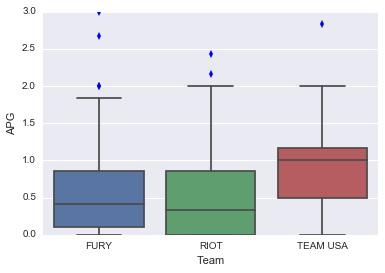

In [262]:
sns.boxplot(x="Team", y="APG", data=furyriotusa)

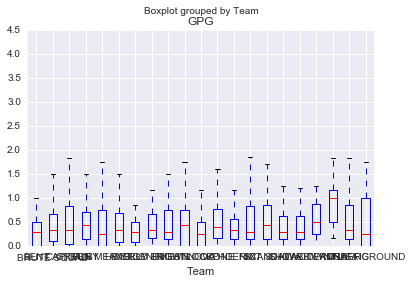

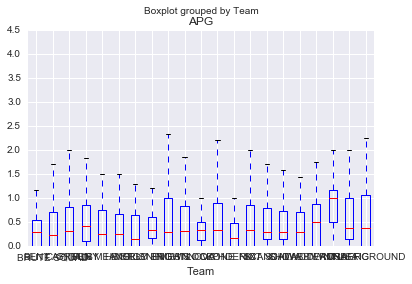

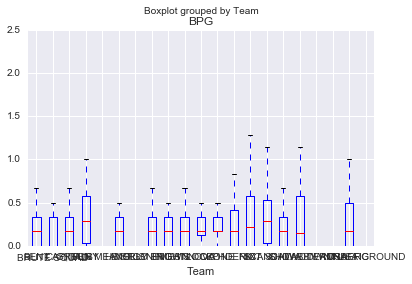

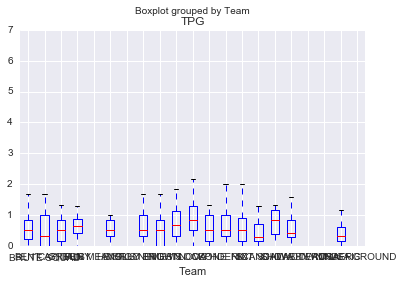

In [270]:
mega_stats.boxplot(column='GPG', by='Team')
mega_stats.boxplot(column='APG', by='Team')
mega_stats.boxplot(column='BPG', by='Team')
mega_stats.boxplot(column='TPG', by='Team')

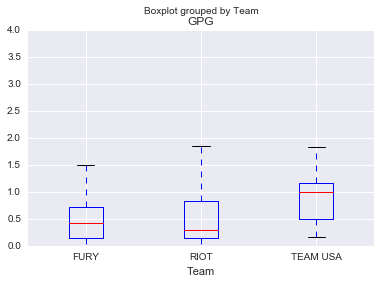

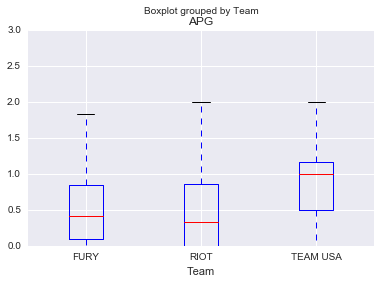

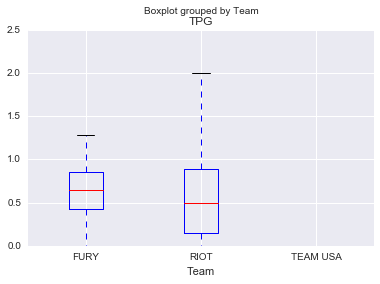

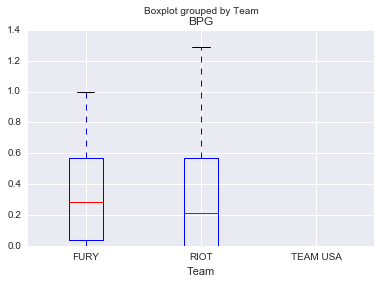

In [271]:
furyriotusa.boxplot(column='GPG', by='Team')
furyriotusa.boxplot(column='APG', by='Team')
furyriotusa.boxplot(column='TPG', by='Team')
furyriotusa.boxplot(column='BPG', by='Team')

In [ ]:
sns.boxplot(x="Team",y="Goals",data=stats_13[(stats_13.Team == 'Fury') | (stats_13.Team == 'Riot') | (stats_13.Team == 'Scandal')])

In [ ]:
sns.boxplot(x="Team",y="Assists",data=stats_13[(stats_13.Team == 'Fury') | (stats_13.Team == 'Riot') | (stats_13.Team == 'Scandal')])

In [ ]:
sns.boxplot(x="Team",y="Ds",data=stats_13[(stats_13.Team == 'Fury') | (stats_13.Team == 'Riot') | (stats_13.Team == 'Scandal')])

In [ ]:
sns.boxplot(x="Team",y="TOs",data=stats_13[(stats_13.Team == 'Fury') | (stats_13.Team == 'Riot') | (stats_13.Team == 'Scandal')])

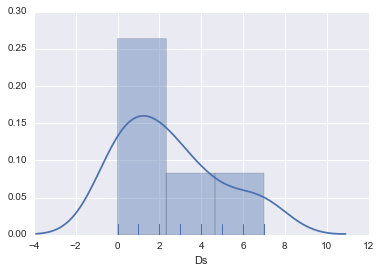

In [145]:
sns.distplot(stats_13[stats_13.Team == 'Fury'].Ds,  rug=True)

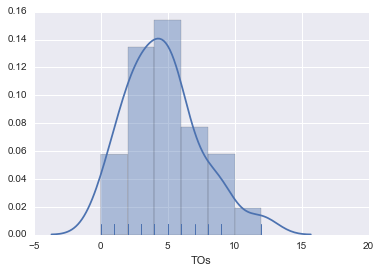

In [146]:
sns.distplot(stats_13[stats_13.Team == 'Fury'].TOs,  rug=True)

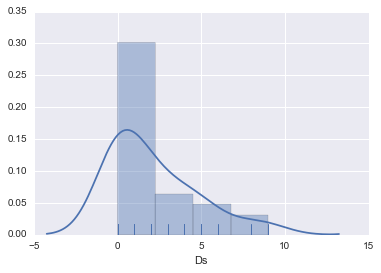

In [147]:
sns.distplot(stats_13[stats_13.Team == 'Riot'].Ds,  rug=True)

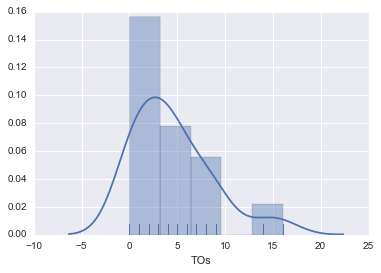

In [148]:
sns.distplot(stats_13[stats_13.Team == 'Riot'].TOs,  rug=True)

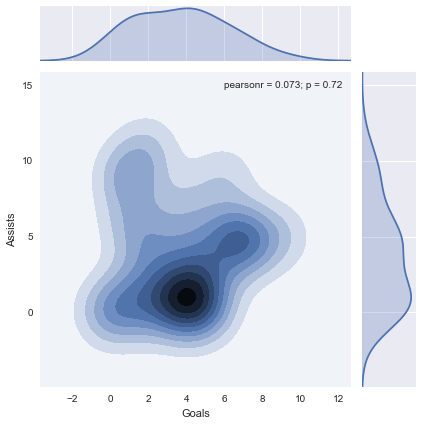

In [149]:
sns.jointplot("Goals","Assists",data=stats_13[stats_13.Team == 'Fury'], kind='kde')

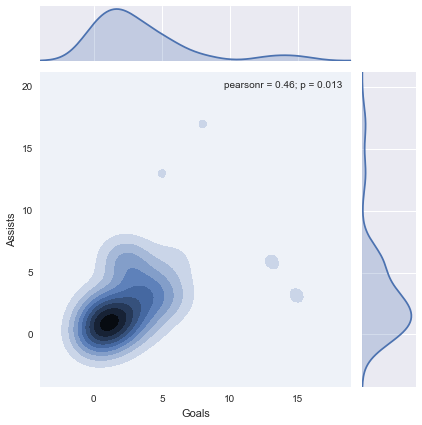

In [150]:
sns.jointplot("Goals","Assists",data=stats_13[stats_13.Team == 'Riot'], kind='kde')

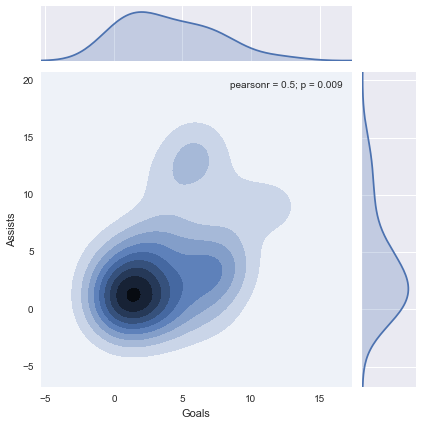

In [151]:
sns.jointplot("Goals","Assists",data=stats_13[stats_13.Team == 'Scandal'], kind='kde')

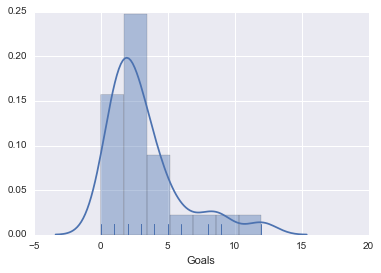

In [152]:
# stats_15[stats_15.Team == 'Fury'].Goals.plot(kind="hist")
sns.distplot(stats_15[stats_15.Team == 'Fury'].Goals,  rug=True)

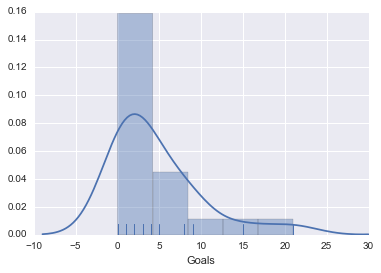

In [153]:
# stats_15[stats_15.Team == 'Scandal'].Goals.plot(kind="hist")
sns.distplot(stats_15[stats_15.Team == 'Scandal'].Goals,  rug=True)

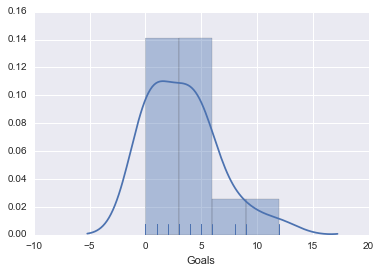

In [154]:
# stats_14[stats_14.Team == 'Fury'].Goals.plot(kind="hist")
sns.distplot(stats_14[stats_14.Team == 'Fury'].Goals,  rug=True)

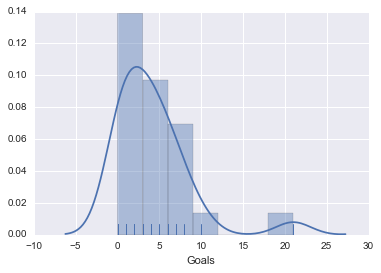

In [155]:
# stats_14[stats_14.Team == 'Scandal'].Goals.plot(kind="hist")
sns.distplot(stats_14[stats_14.Team == 'Scandal'].Goals,  rug=True)

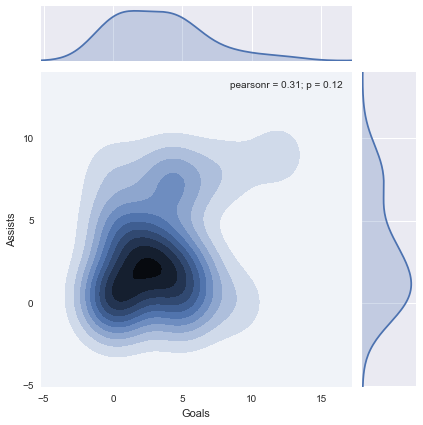

In [156]:
sns.jointplot("Goals","Assists",data=stats_14[stats_14.Team == 'Fury'], kind='kde')

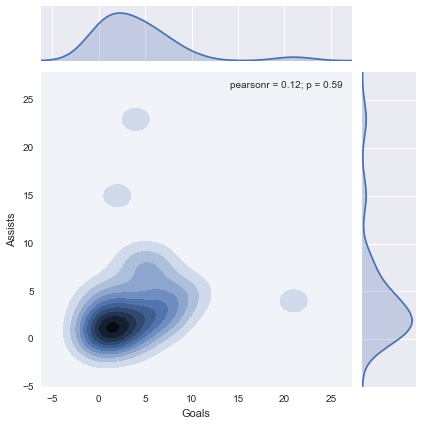

In [157]:
sns.jointplot("Goals","Assists",data=stats_14[stats_14.Team == 'Scandal'], kind='kde')

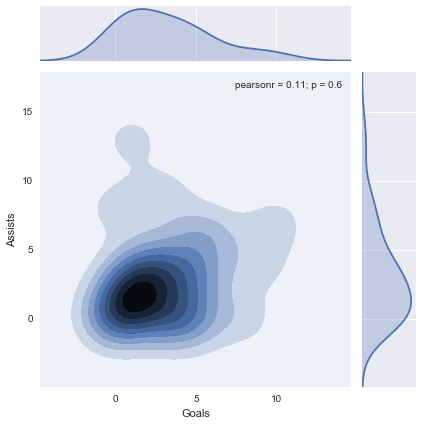

In [158]:
sns.jointplot("Goals","Assists",data=stats_14[stats_14.Team == 'Riot'], kind='kde')

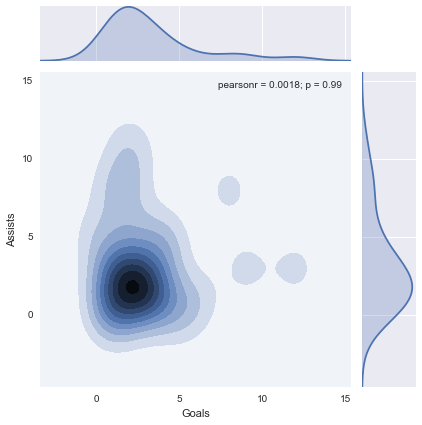

In [159]:
sns.jointplot("Goals","Assists",data=stats_15[stats_15.Team == 'Fury'], kind='kde')

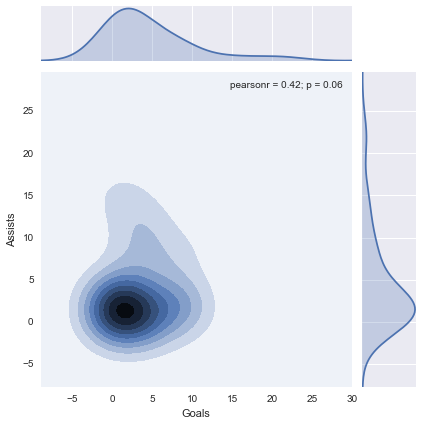

In [160]:
sns.jointplot("Goals","Assists",data=stats_15[stats_15.Team == 'Scandal'], kind='kde')

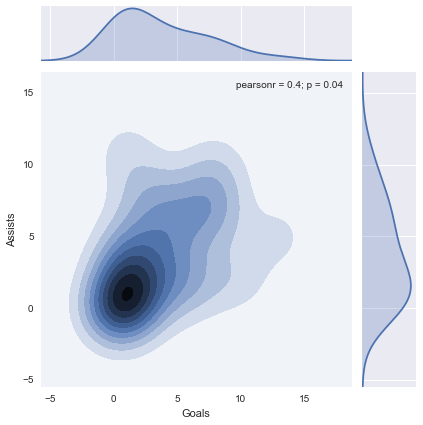

In [161]:
sns.jointplot("Goals","Assists",data=stats_15[stats_15.Team == 'Seattle Riot'], kind='kde')

In [162]:
stats_14.Team.value_counts()

Green Means Go    27
Heist             27
Showdown          26
Fury              26
Riot              26
Nightlock         26
Brute Squad       26
Schwa             25
Scandal           24
Traffic           24
Underground       24
Molly Brown       23
Capitals          23
Nemesis           23
Ozone             22
Tabby Rosa        19
Name: Team, dtype: int64

In [163]:
stats_14['Team_num'] = stats_14.Team.map({'Fury':0, 'Riot':1, 'Scandal':2})

ValueError: to_rgba: Invalid rgba arg "T"
to_rgb: Invalid rgb arg "T"
could not convert string to float: t

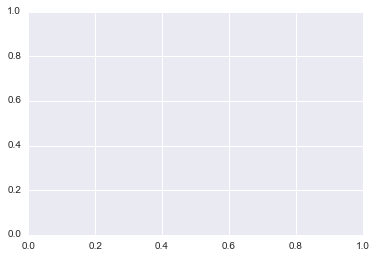

In [164]:
from matplotlib import colors

# create a custom color scale
col_map = colors.ListedColormap(['white', 'red',"blue"])

# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
stats_14[(stats_14.Team == 'Fury') | (stats_14.Team == 'Riot') | (stats_14.Team == 'Scandal')].plot(kind="scatter",x="Goals",y="Assists",c="Team",cmap=col_map)

In [ ]:
# might consider stats averaged per game to account for teams that have more games